In [ ]:
# data undestanding

In [1]:
import pandas as pd

In [2]:
path = "/content/drive/MyDrive/dataset/titanic_train.csv"
df = pd.read_csv(path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


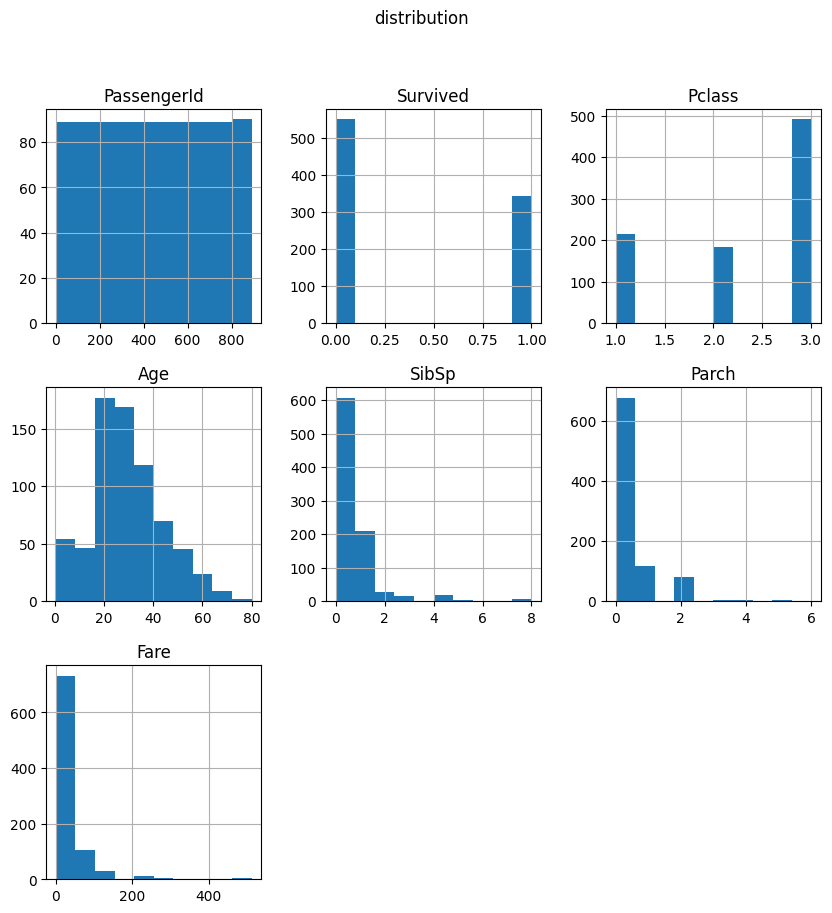

In [ ]:
# DISTIBUTION OF ALL COULUMNS
df.hist(figsize=(10,10))
plt.suptitle("distribution")
plt.show()

In [ ]:
df.duplicated().sum()

np.int64(0)

In [4]:
# remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# data pre-processing

In [5]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df['Age'].isnull().mean() * 100 # impute with mean as it seems a bit of normal distribution


np.float64(19.865319865319865)

In [ ]:
df['Cabin'].isnull().mean() * 100 # as % is above 50 drop it

np.float64(77.10437710437711)

In [6]:
df['Age'].fillna(df['Age'].mean(),inplace = True)

<ipython-input-6-e03dc3d9eb49>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace = True)


In [7]:
df.drop('Cabin',axis=1,inplace = True)


In [ ]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [8]:
# mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


<ipython-input-8-51f3b6987673>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [9]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# handling outliers.


In [ ]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


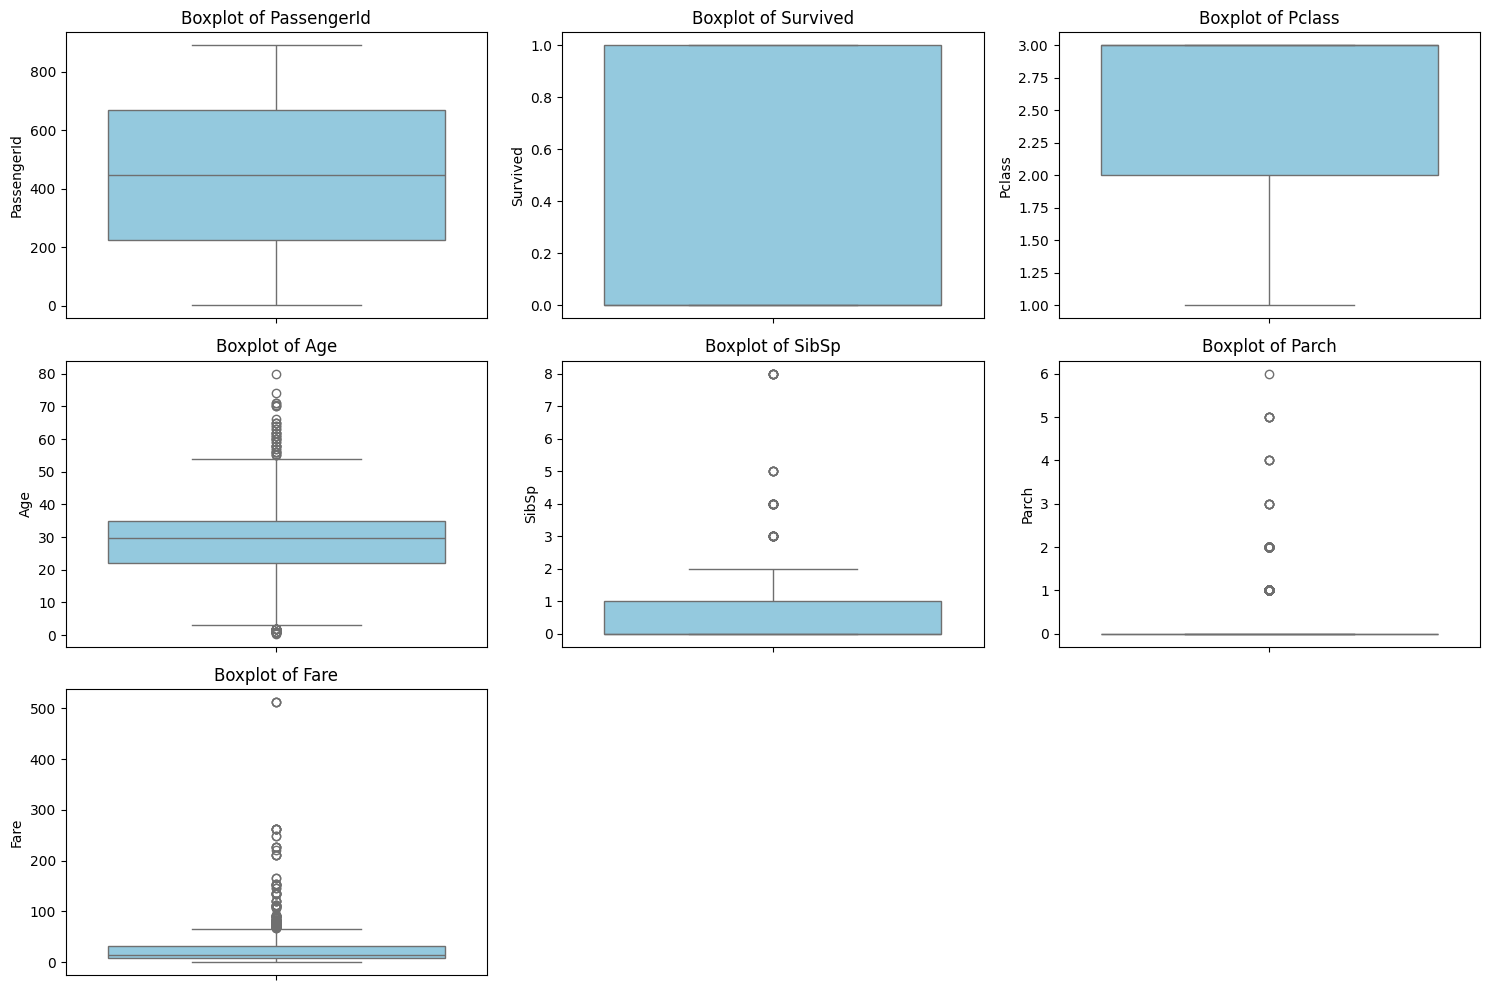

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()

plt.show()


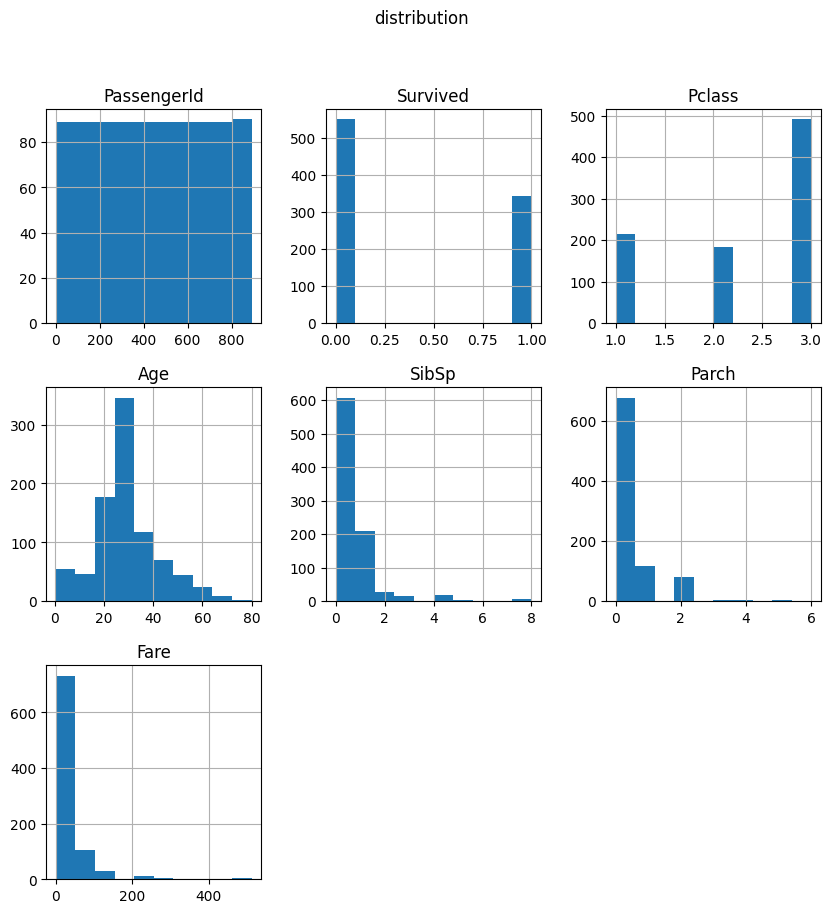

In [ ]:
df.hist(figsize=(10,10))
plt.suptitle("distribution")
plt.show()

In [ ]:
# Zscore

In [10]:
from scipy.stats import zscore
import numpy as np
newdf = df.copy()
cols_new =['Age']
z_score = np.abs(zscore(newdf[cols_new]))
newdf = newdf[(z_score < 3).all(axis=1)]
print("Original data shape: ", df.shape)
print("After Z-Score Outlier Removal:", newdf.shape)


Original data shape:  (891, 11)
After Z-Score Outlier Removal: (884, 11)


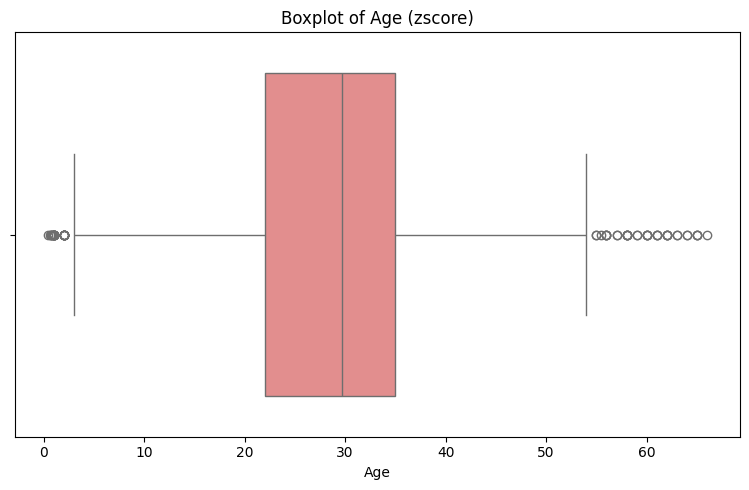

In [11]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

for i, col in enumerate(cols_new, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=newdf[col], color='lightcoral')
    plt.title(f'Boxplot of {col} (zscore)')

plt.tight_layout()
plt.show()




In [12]:
cols = ['Fare','Parch','SibSp']
for i in cols:
  q1 = newdf[i].quantile(0.25)
  q3 = newdf[i].quantile(0.75)
  iqr = q3-q1
  lower_bound = q1 - (1.5*iqr)
  upper_bound = q3 + (1.5*iqr)
  newdf = newdf[(newdf[i] >= lower_bound) & (newdf[i] <= upper_bound)]
print('The original: ',df.shape)
print('After IQR: ',newdf.shape)

The original:  (891, 11)
After IQR:  (497, 11)


In [ ]:
# scaling.

In [13]:
# 1.newdf has fare,parch,sibsp these are not normal disribution but outliers are there.---> robust scaling
from sklearn.preprocessing import RobustScaler


# Apply RobustScaler
scaler = RobustScaler()
newdf[cols] = scaler.fit_transform(newdf[cols])
print(newdf[cols])

         Fare  Parch  SibSp
2   -0.023810    0.0    0.0
4    0.000000    0.0    0.0
5    0.077771    0.0    0.0
6    8.345238    0.0    0.0
11   3.523810    0.0    0.0
..        ...    ...    ...
884 -0.190476    0.0    0.0
886  0.942857    0.0    0.0
887  4.180952    0.0    0.0
889  4.180952    0.0    0.0
890 -0.057143    0.0    0.0

[497 rows x 3 columns]


In [14]:
#2. Age column is normal distributed so standard scaler.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
newdf[cols_new] = scaler.fit_transform(newdf[cols_new])
print(newdf[cols_new])

          Age
2   -0.488710
4    0.375087
5   -0.133678
6    2.198657
11   2.582567
..        ...
884 -0.584687
886 -0.392732
887 -1.160551
889 -0.488710
890  0.087155

[497 rows x 1 columns]


In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
# Encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
newdf['Sex'] = le.fit_transform(newdf['Sex'])
print(newdf['Sex'])

2      0
4      1
5      1
6      1
11     0
      ..
884    1
886    1
887    0
889    1
890    1
Name: Sex, Length: 497, dtype: int64


In [ ]:
newdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.881091,1.0,0.0,A/5 21171,-0.173987,S
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.479088,0.0,0.0,STON/O2. 3101282,-0.092876,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.425420,1.0,0.0,113803,5.335588,S
4,5,0,3,"Allen, Mr. William Henry",1,0.425420,0.0,0.0,373450,-0.077855,S
5,6,0,3,"Moran, Mr. James",1,-0.107324,0.0,0.0,330877,-0.028792,Q


In [ ]:
newdf['Sex'].value_counts()

,count
Sex,
1,460
0,147


In [ ]:
#one-hot Encoding.

In [16]:
# One-hot encoding
dummies = pd.get_dummies(newdf['Embarked'], prefix='Embarked', drop_first=True)

# Convert True/False to 1/0
dummies = dummies.astype(int)

# Concatenate with original dataframe
newdf = pd.concat([newdf.drop('Embarked', axis=1), dummies], axis=1)

print(newdf.head())


    PassengerId  Survived  Pclass                      Name  Sex       Age  \
2             3         1       3    Heikkinen, Miss. Laina    0 -0.488710   
4             5         0       3  Allen, Mr. William Henry    1  0.375087   
5             6         0       3          Moran, Mr. James    1 -0.133678   
6             7         0       1   McCarthy, Mr. Timothy J    1  2.198657   
11           12         1       1  Bonnell, Miss. Elizabeth    0  2.582567   

    SibSp  Parch            Ticket      Fare  Embarked_Q  Embarked_S  
2     0.0    0.0  STON/O2. 3101282 -0.023810           0           1  
4     0.0    0.0            373450  0.000000           0           1  
5     0.0    0.0            330877  0.077771           1           0  
6     0.0    0.0             17463  8.345238           0           1  
11    0.0    0.0            113783  3.523810           0           1  


In [ ]:
# train and test the data/or split

In [17]:
X = newdf.drop(columns=['Survived'])
y = newdf['Survived']

In [18]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np


In [19]:
X_train, X_test,y_train,y_test = train_test_split(
    X,y,random_state=42,test_size=0.2,stratify=y
)
# check the distribution
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

Survived
0    0.72796
1    0.27204
Name: proportion, dtype: float64
Survived
0    0.73
1    0.27
Name: proportion, dtype: float64


In [20]:
# Drop 'Name' and 'Ticket' columns
X_train = X_train.drop(['Name', 'Ticket'], axis=1, errors='ignore')
X_test = X_test.drop(['Name', 'Ticket'], axis=1, errors='ignore')


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Logistic Regression
Accuracy: 0.82
[[66  7]
 [11 16]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        73
           1       0.70      0.59      0.64        27

    accuracy                           0.82       100
   macro avg       0.78      0.75      0.76       100
weighted avg       0.81      0.82      0.82       100



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
newdf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.881091,1.0,0.0,A/5 21171,-0.173987,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.479088,0.0,0.0,STON/O2. 3101282,-0.092876,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.425420,1.0,0.0,113803,5.335588,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0.425420,0.0,0.0,373450,-0.077855,0,1
5,6,0,3,"Moran, Mr. James",1,-0.107324,0.0,0.0,330877,-0.028792,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",1,-0.579589,0.0,0.0,SOTON/OQ 392076,-0.198020,0,1
886,887,0,2,"Montvila, Rev. Juozas",1,-0.378587,0.0,0.0,211536,0.516963,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,-1.182594,0.0,0.0,112053,2.559772,0,1
889,890,1,1,"Behr, Mr. Karl Howell",1,-0.479088,0.0,0.0,111369,2.559772,0,0


In [22]:
print(X.dtypes)
print(X.select_dtypes(include='object').columns)


PassengerId      int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp          float64
Parch          float64
Ticket          object
Fare           float64
Embarked_Q       int64
Embarked_S       int64
dtype: object
Index(['Name', 'Ticket'], dtype='object')


In [23]:
X = newdf.drop(columns=['Survived', 'Name', 'Ticket'])  # Drop non-numeric columns
y = newdf['Survived']


In [ ]:
print(X.select_dtypes(include='object').columns)


Index([], dtype='object')


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# Train
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and Evaluate
y_pred = model.predict(X_test)

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Results:
Accuracy: 0.82
Confusion Matrix:
 [[66  7]
 [11 16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88        73
           1       0.70      0.59      0.64        27

    accuracy                           0.82       100
   macro avg       0.78      0.75      0.76       100
weighted avg       0.81      0.82      0.82       100



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
# Logistic Regression with class weights
log_model = LogisticRegression(class_weight='balanced', max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression (Balanced Class Weights)")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))


Logistic Regression (Balanced Class Weights)
Accuracy: 0.81
Confusion Matrix:
 [[61 12]
 [ 7 20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87        73
           1       0.62      0.74      0.68        27

    accuracy                           0.81       100
   macro avg       0.76      0.79      0.77       100
weighted avg       0.82      0.81      0.81       100



In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [27]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classifier
Accuracy: 0.84
Confusion Matrix:
 [[68  5]
 [11 16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89        73
           1       0.76      0.59      0.67        27

    accuracy                           0.84       100
   macro avg       0.81      0.76      0.78       100
weighted avg       0.83      0.84      0.83       100



In [28]:
from imblearn.over_sampling import SMOTE


In [29]:
# Split your data (already done)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check new class balance
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())


Before SMOTE: Survived
0    289
1    108
Name: count, dtype: int64
After SMOTE: Survived
1    289
0    289
Name: count, dtype: int64


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train on SMOTE-balanced data
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_smote, y_train_smote)

# Predict on actual test set
y_pred = log_model.predict(X_test)

# Evaluate the result
print("Logistic Regression (with SMOTE)")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression (with SMOTE)
Accuracy: 0.82
Confusion Matrix:
 [[65  8]
 [10 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88        73
           1       0.68      0.63      0.65        27

    accuracy                           0.82       100
   macro avg       0.77      0.76      0.77       100
weighted avg       0.82      0.82      0.82       100



In [31]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest (with SMOTE)")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest (with SMOTE)
Accuracy: 0.79
Confusion Matrix:
 [[61 12]
 [ 9 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.84      0.85        73
           1       0.60      0.67      0.63        27

    accuracy                           0.79       100
   macro avg       0.74      0.75      0.74       100
weighted avg       0.80      0.79      0.79       100



In [32]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Support Vector Classifier
svc_model = SVC()
svc_model.fit(X_train_smote, y_train_smote)
y_pred_svc = svc_model.predict(X_test)

print("SVC Results")
print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))
print("Classification Report:\n", classification_report(y_test, y_pred_svc))


# 2. XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_smote, y_train_smote)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Results")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


# 3. Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_smote, y_train_smote)
y_pred_gb = gb_model.predict(X_test)

print("Gradient Boosting Results")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))


SVC Results
Accuracy: 0.64
Confusion Matrix:
 [[48 25]
 [11 16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.66      0.73        73
           1       0.39      0.59      0.47        27

    accuracy                           0.64       100
   macro avg       0.60      0.63      0.60       100
weighted avg       0.70      0.64      0.66       100

XGBoost Results
Accuracy: 0.78
Confusion Matrix:
 [[61 12]
 [10 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85        73
           1       0.59      0.63      0.61        27

    accuracy                           0.78       100
   macro avg       0.72      0.73      0.73       100
weighted avg       0.79      0.78      0.78       100



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:59:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Gradient Boosting Results
Accuracy: 0.81
Confusion Matrix:
 [[62 11]
 [ 8 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.85      0.87        73
           1       0.63      0.70      0.67        27

    accuracy                           0.81       100
   macro avg       0.76      0.78      0.77       100
weighted avg       0.82      0.81      0.81       100

